# Project Business Statistics: E-news Express

**Marks: 60**


## Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on day-to-day events occurring globally. Information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to users. There are multiple advantages of transmitting new electronically, like faster access to content and ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.  The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of outline & recommended content to keep customers engaged long enough to make a decision to subscribe.


## Problem statement and objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do users spend more time on new landing page than on existing landing page?

2. Is conversion rate (the proportion of users who visit the landing page and get converted) for new page greater than conversion rate for old page?

3. Does converted status depend on preferred language?

4. Is time spent on new page the same for different language users?


## Data Dictionary

The data contains information regarding interaction of users in both groups with two versions of landing page.

1. user_id - Unique user ID of person visiting website

2. group - Whether user belongs to first group (control) or second group (treatment)

3. landing_page - Whether landing page is new or old

4. time_spent_on_the_page - Time (in minutes) spent by user on landing page

5. converted - Whether user gets converted to a subscriber of news portal or not

6. language_preferred - Language chosen by user to view landing page

## Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Reading Data into a DataFrame

In [2]:
data = pd.read_csv('abtest.csv')
data

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [3]:
df = data.copy()  # create a copy of original dataset for further use
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


### Data Overview

In [4]:
# Viewing first few rows of dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [5]:
# Viewing last few rows of dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [6]:
# view shape of dataset
df.shape

(100, 6)

In [7]:
# check data types of columns in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


####Observations:

* There are two numerical variables: user_id, time_spent_on_the_page
* There are 4 categorical variables: group,landing_page,converted,language_preferred

In [8]:
# Statistical summary for all variables
df.describe(include = 'all')

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


#### Observations:

* Mean time spent on the page is 5.37 minutes. Minimum time spent is 0.19, max time is 10.71 minutes respectively. Standard deviation being 2.71 minutes.
* There are 3 unique language users, Spanish being the most common, 34(out of 100) are Spanish speakers.
* There are 2 unique values in "converted" column, yes and no. 54(out of 100) users got converted to subscribers.
* There are 2 unique groups, control and treatment, each with 50 users as described in business context.
* There are two unique landing pages, old and new, each with 50 users as described in business context.
* user_id is the unique id of person visiting website, no meaningful insights from analyzing this variable.

In [9]:
# Check for missing values
df.isnull().values.any()

False

In [10]:
# check for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

There are no missing values in any column of dataset.

In [11]:
 # Check for duplicate rows
df[df.duplicated()].shape[0]

0

There are no duplicate rows in dataset.

### Univariate Analysis

#### Time spent on the page

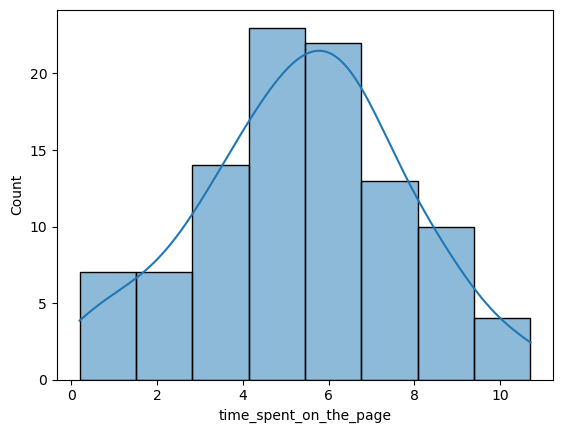

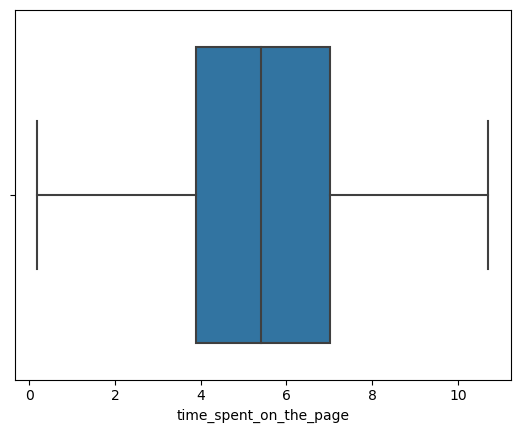

In [12]:
sns.histplot(data=df,x='time_spent_on_the_page', kde = True) #histogram to plot time spent on page distribution
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')  #boxplot to show 5 point summary of time spent on page column
plt.show()

#### Observations:

* Time_spent_on_the_page histogram suggests normal distribution.
* Values range between 0.2 - 11 minutes.
* Mean time spent on page is 5.37 minutes.
* Minimum time spent on page is 0.19 minutes.
* Maximum time spent on page is 10.71 minutes.
* Standard deviation is 2.37 minutes.
* 50% of subscribers spend about 5.41 minutes on the page.
* Q1(1st quartile) is about 4 minutes, Q3(3rd quartile) is about 7 minutes.
* There are no outliers in data, no unusually small or large data points in terms of time spent.

#### Group

In [13]:
df['group'].value_counts() # returns unique values in "group" column

control      50
treatment    50
Name: group, dtype: int64

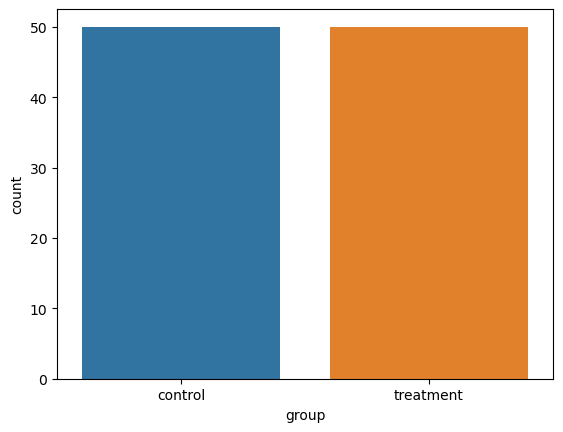

In [14]:
sns.countplot(data=df,x='group') #plot to show counts of control and treatment groups 
plt.show()

#### Observations:

* Per problem statement, there are two unique values in "group" column - Control and Treatment.
* Per problem statement, Control and Treatment groups have equal users(50).

#### Landing page

In [15]:
df['landing_page'].value_counts() # returns unique values in "landing_page" column

old    50
new    50
Name: landing_page, dtype: int64

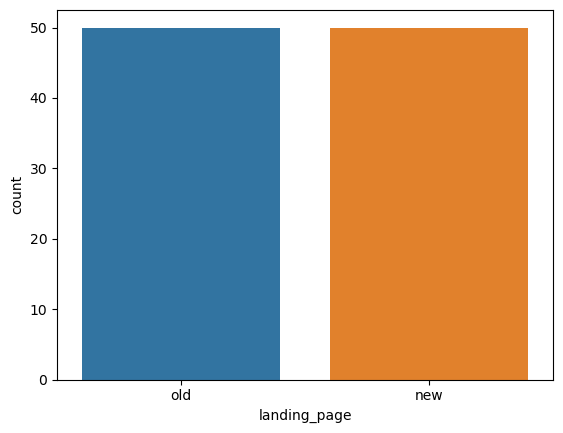

In [16]:
sns.countplot(data=df,x='landing_page') #plot to show counts of landing page
plt.show()

#### Observations:

* Per problem statement, there are two unique landing pages, old and new, viewed by equal number of users(50).

#### Converted

In [17]:
df['converted'].value_counts() # returns unique values in "converted" column

yes    54
no     46
Name: converted, dtype: int64

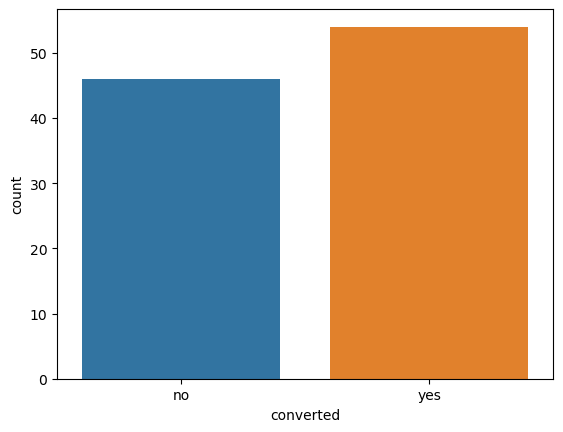

In [18]:
sns.countplot(data=df,x='converted') # plot to show counts of converted status
plt.show()

#### Observations:

* 54 out of 100 users got converted to subscribers.

#### Language preferred

In [19]:
df['language_preferred'].value_counts() # returns unique values in "language_preferred" column

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

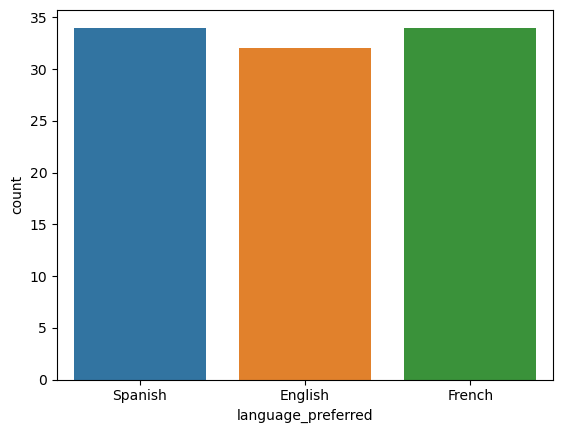

In [20]:
sns.countplot(data=df,x='language_preferred') #plot to show counts of language preferred
plt.show()

#### Observations:

* Out of 100 users, there are 34 Spanish, 34 French and 32 English users.

### Bivariate Analysis

#### Landing page vs Time spent on the page

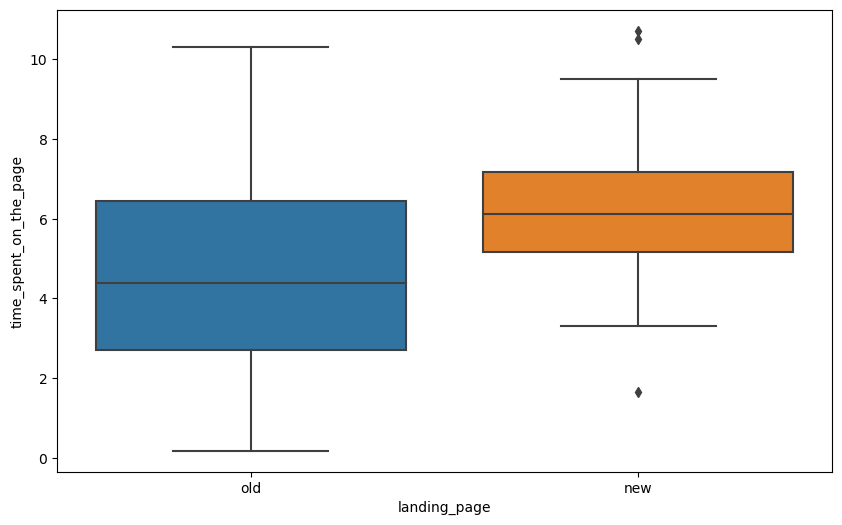

In [21]:
# boxplot to show distribution of landing page vs time spent on page
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Observations:

* Mean time spent on new landing page is higher than old landing page.
* Minimum time spent on new page is higher than minimum time spent on old page.
* There are some outliers in time spent on new landing page.

#### Conversion status vs Time spent on the page

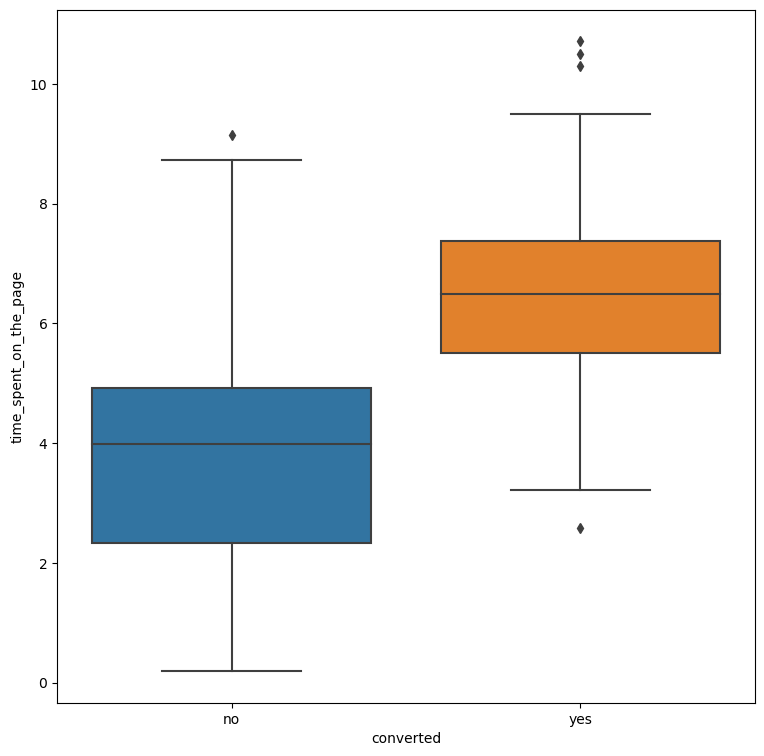

In [22]:
# boxplot to show distribution of conversion status vs time spent on page
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'converted', y = 'time_spent_on_the_page')
plt.show()

#### Observations:

* Users who got converted to subscribers spent more mean time on page than users who did not convert.

#### Language Preferred vs Time spent on the page

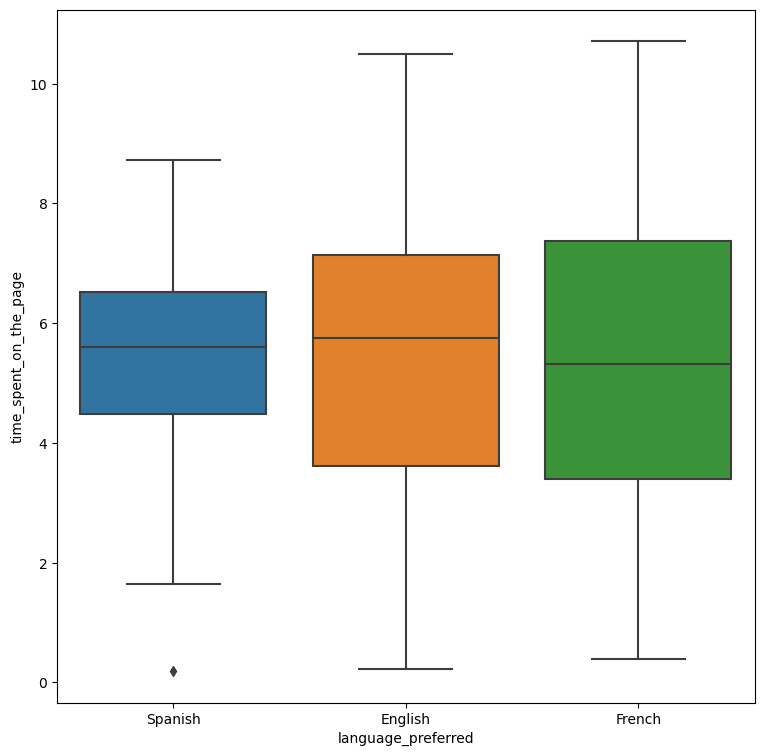

In [23]:
# boxplot to show distribution of language preferred vs time spent on page
plt.figure(figsize=(9, 9))
sns.boxplot(data = df, x = 'language_preferred', y ='time_spent_on_the_page')
plt.show()

#### Observations:

* Mean time spent on page by all three language users is between 5 - 6 minutes.
* English users spent the highest mean time on page, followed by Spanish and French.

## 1. Do users spend more time on new landing page than existing landing page?

### Step 1: Perform Visual Analysis

#### Landing page vs Time spent on the page

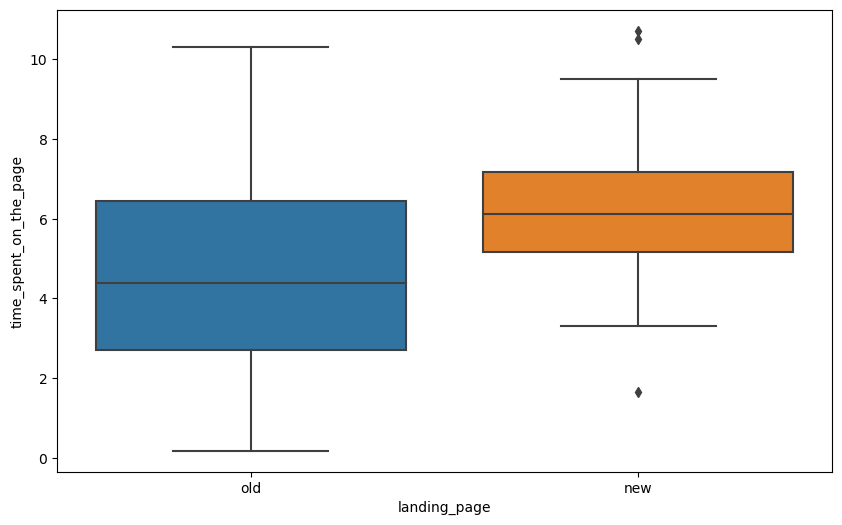

In [24]:
# boxplot to show distribution of landing page vs time spent on page
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='landing_page',y='time_spent_on_the_page')
plt.show()

#### Observations:

* Median time spent on landing page(old) is about 4.2 minutes.
* Median time spent on landing page(new) is about 6 minutes.
* Time spent on old landing page ranges between 0 and 10 minutes(approximately).
* Time spent on new landing page ranges between 3 and 7 minutes (approximately).
* New landing page shows some outliers in data (users outside the range of time spent on page), some users spending less than the 2 minutes, some users spending more than 10 minutes.
* Visual analysis suggests users spend more time on new versus old landing page. Lets continue to test statistically.

### Step 2: Define null and alternate hypotheses

Null $H_0$: Mean time spent on new landing page is less than or equal to, mean time spent on old landing page.

Alternate $H_a$: Mean time spent on new landing page is more than, mean time spent on old landing page.


### Step 3: Select Appropriate test and Decide significance level

* This is a one-tailed test concerning two population means from two independent populations, population standard deviations are unknown. 
* Two sample independent t-test will be used.
* As given in problem statement, select α = 0.05.

Check for two independent sample t-test assumptions:

* Data is continuous - yes, time spent on landing pages are measured on a continuous scale.
* Normally distributed populations - population distributions are assumed to be normal.
* Populations are independent - new and old landing page users are two independent populations.
* Unequal population standard deviations - as sample std deviations are different,population std deviations are assumed to be different.
* Random sampling from populations - yes, users were selected randomly.
* Yes, we can use two independent sample t-test as assumptions are satisfied.

### Step 4: Collect and prepare data to calculate p-value

In [25]:
# data frame subset for new landing page users 
time_spent_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# data frame subset for old landing page users
time_spent_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [26]:
print('Sample standard deviation of time spent(in minutes) on new page is:', round(time_spent_new.std(),2))
print('Sample standard deviation of time spent(in minutes) on old page is:', round(time_spent_old.std(),2))

Sample standard deviation of time spent(in minutes) on new page is: 1.82
Sample standard deviation of time spent(in minutes) on old page is: 2.58


In [27]:
# import required function
from scipy.stats import ttest_ind

# calculate test_statistic and p_value
test_stat, p_value = ttest_ind(time_spent_new, time_spent_old, equal_var = False, alternative = 'greater')

print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 5: Draw inference

In [28]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As p-value {p_value} is less than level of significance, we reject null hypothesis.')
else:
    print(f'As p-value {p_value} is greater than level of significance, we fail to reject null hypothesis.')

As p-value 0.0001392381225166549 is less than level of significance, we reject null hypothesis.


* Since p_value is less than 0.05, null hypothesis is rejected.
* Thus, there is enough statistical evidence to say users spend more time on new landing page than existing landing page.

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Step 1: Perform Visual Analysis

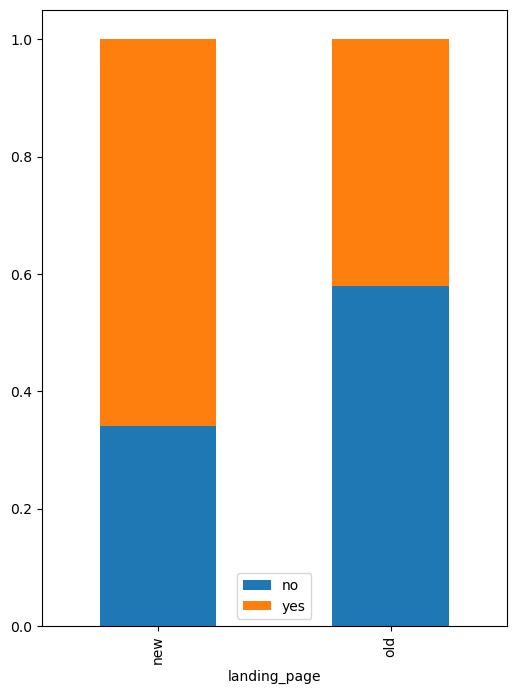

In [29]:
# stacked barplot to analyze new page conversion rate and old page conversion rate
pd.crosstab(df["landing_page"],df["converted"],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

#### Observations:

* Visual analysis suggests new landing page has higher conversion rate than old landing page. Lets continue to test statistically.

### Step 2: Define null and alternate hypotheses

Null $H_0$: Conversion rate of new landing page is less than or equal to, conversion rate of old landing page.

Alternate $H_a$: Conversion rate of new landing page is greater than conversion rate of old landing page.

### Step 3: Select Appropriate test and Decide significance level

* This is a one-tailed test concerning two population proportions from two independent populations. 
* Two proportions z-test will be used.
* As given in problem statement, select α = 0.05.

Check for Two proportions z-test assumptions:

* Binomally distributed population - Yes, user is either converted(yes) or not(no).
* Random sampling from population - Yes, users were selected randomly.
* Can the binomial distribution approximated to normal distribution - Yes.
* Yes, assumptions satisfied, Two proportions z-test can be used.

### Step 4: Collect and prepare data to calculate p-value

In [30]:
# import required fuction
from statsmodels.stats.proportion import proportions_ztest

# number of converted users in treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

# number of converted users in control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in control group(old page)
n_treatment = df.group.value_counts()['treatment'] # total number of users in treatment group(new page)

print('The numbers of users served new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))
print('The numbers of users converted in control and treatment groups are {0} and {1} respectively'.format(old_converted, new_converted))

conversion_rate_new = new_converted/n_treatment  # old page conversion rate
print("Conversion rate for new page:", conversion_rate_new)
conversion_rate_old = old_converted/n_control # new page conversion rate
print ("Conversion rate for old page:", conversion_rate_old)

The numbers of users served new and old pages are 50 and 50 respectively
The numbers of users converted in control and treatment groups are 21 and 33 respectively
Conversion rate for new page: 0.66
Conversion rate for old page: 0.42


In [31]:
# set counts of converted users
converted_count = np.array([old_converted,new_converted])

# set sample sizes
nobs = np.array([n_control, n_treatment])

test_stat, p_value = proportions_ztest(converted_count, nobs)
print('The p-value is ' + str(p_value))

The p-value is 0.016052616408112556


### Step 5: Draw Inference

* As p-value is less than significance level 0.05, null hypothesis is rejected. 
* Thus, there is enough statistical evidence to say conversion rate of new landing page is greater than conversion rate of old landing page.

## 3. Are conversion and preferred language independent or related?

### Step 1: Perform Visual Analysis

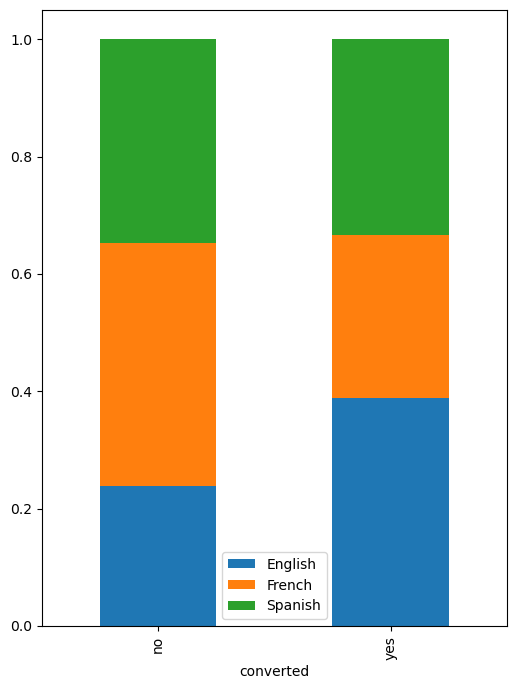

In [32]:
# stacked barplot to analyze dependence between conversion status and preferred langauge
pd.crosstab(df["converted"],df["language_preferred"],normalize='index').plot(kind="bar", figsize=(6,8), stacked=True)
plt.legend()
plt.show()

### Observations:

* Visual analysis suggests English language users showing most conversions, followed by Spanish and French.

### Step 2: Define null and alternate hypotheses

Null hypothesis: $H_0:$ Conversion is independent of preferred language.

Alternate hypothesis:  $H_a$: Conversion is not independent on preferred language.

### Step 3: Select Appropriate test and Decide significance level

* This is a test of independence, concerning two categorical variables - converted status and preferred language.
* Chi-square test of independence will be used.
* As given in problem statement, select α = 0.05.

Check for Chi-square test of independence assumptions:
* Categorical variables - Yes
* Expected value of number of sample observations in each level of the variable is at least 5 - Yes, the number of observations in each level is greater than 5.
* Random sampling from the population - Yes, we are informed that the collected sample is a simple random sample.

### Step 4: Collect and prepare data to calculate p-value

In [33]:
# import required function
from scipy.stats import chi2_contingency

# contingency table with converted users, preferred language variables
contingency_table = pd.crosstab(df["converted"],df["language_preferred"])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


In [34]:
# print p_value using chi2_contingency test
chi, p_value, dof, expected = chi2_contingency(contingency_table)
print('The p-value is', p_value)

# print conclusion based on p-value
if p_value < 0.05:
    print(f'As p-value {p_value} is less than level of significance, we reject null hypothesis.')
else:
    print(f'As p-value {p_value} is greater than level of significance, we fail to reject null hypothesis.')

The p-value is 0.21298887487543447
As p-value 0.21298887487543447 is greater than level of significance, we fail to reject null hypothesis.


### Step 5: Draw Inference

* As p-value is greater than significance level 0.05, we fail to reject null hypothesis.
* Thus, there is enough statistical evidence to say conversion rate is independent of language.

## 4. Is the time spent on new page same for different language users?

### Step 1: Perform Visual Analysis

In [35]:
# DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

In [36]:
# number of users for each language
print(df_new["language_preferred"].value_counts())

Spanish    17
French     17
English    16
Name: language_preferred, dtype: int64


In [37]:
# mean time spent on new landing page by different language users
print(df_new.groupby("language_preferred")["time_spent_on_the_page"].mean())

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64


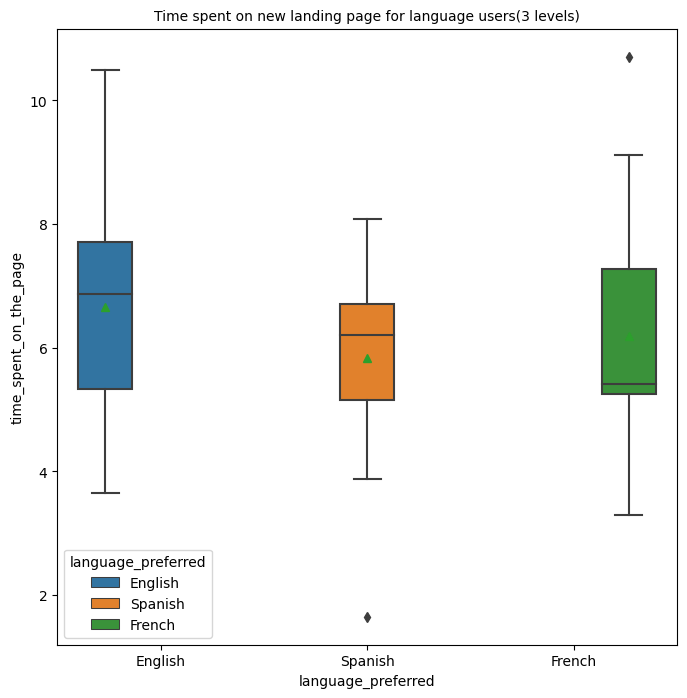

In [38]:
# boxplot to visually plot time spent on new page for different language users
plt.figure(figsize=(8,8))
a = sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", showmeans = True, data = df_new, hue = 'language_preferred')
a.set_title("Time spent on new landing page for language users(3 levels)", fontsize=10)
plt.show()

### Observations:

* English users spend highest average time on new page (6.66 minutes), followed by French(6.19 minutes) and Spanish(5.83 minutes).

### Step 2: Define null and alternate hypotheses

Null: $H_0:$  Mean time spent on new landing page is same for three language users.

Alternate: $H_a:$ At least one, mean time spent on new landing page, is different from other two languages.

### Step 3: Select Appropriate test and Decide significance level

This is a problem, concerning three population means. Analysis of Variance Test(ANOVA) will be used.

Check normality and equality of variance assumptions: 

* For testing of normality, Shapiro-Wilk’s test is applied to the response variable.
* For equality of variance, Levene test is applied to the response variable.
* As given in problem statement, select α = 0.05.

### Shapiro-Wilk’s test

Null hypothesis:

>$H_0:$ Mean time spent on the page follows a normal distribution

Alternate hypothesis:

>$H_a:$ Mean time spent on the page does not follow a normal distribution

In [39]:
# Assumption 1: Normality
# import the required function
from scipy import stats

# find the p-value
w, p_value = stats.shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


* Since p_value is greater than 0.05, we fail to reject null hypothesis.
* Hence, there is enough evidence to say time_spent_on_the_page follows a normal distribution.

### Levene’s test

Null hypothesis:

>$H_0$: All the population variances are equal

Alternate hypothesis:

>$H_a$: At least one variance is different from the rest

In [40]:
#Assumption 2: Homogeneity of Variance
#import required function

from scipy.stats import levene
statistic, p_value = levene( df_new['time_spent_on_the_page'][df_new['language_preferred']=="English"], 
                             df_new['time_spent_on_the_page'][df_new['language_preferred']=="French"], 
                             df_new['time_spent_on_the_page'][df_new['language_preferred']=="Spanish"])

print('The p-value is', p_value)

The p-value is 0.46711357711340173


* Since p_value is greater than 0.05, we fail to reject null hypothesis.
* Hence, there is enough evidence to say all population variances are equal.

### ANOVA test assumptions

* The populations are normally distributed - Yes, the normality assumption is verified using Shapiro-Wilk’s test.
* Samples are independent simple random samples - Yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - Yes, the homogeneity of variance assumption is verified using Levene's test.
* One way Anova test assumptions are satisfied.

### Step 4: Collect and prepare data to calculate p-value

In [41]:
#import required function
from scipy.stats import f_oneway

# perform one-way anova test
test_stat, p_value = f_oneway(df_new.loc[df_new['language_preferred'] == 'English', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'French', 'time_spent_on_the_page'],
                              df_new.loc[df_new['language_preferred'] == 'Spanish', 'time_spent_on_the_page'])
print('The p-value is ' + str(p_value))

The p-value is 0.43204138694325955


### Step 5: Draw Inference

* As p-value is greater than 0.05, we fail to reject null hypothesis.
* Hence, there is enough statistical evidence to say mean time spent on new landing page is same for the three language users.

## Conclusions

* Mean time spent on old landing page is 4.2 minutes, new landing page is 6 minutes.
* There is enough statistical evidence to say users spend more time on new landing page than existing landing page.
* Treatment group(50 users) was served new landing page, control group(50 users) was served old landing page. 
* 54 out of 100 users got converted to subscribers. 42% conversion rate for old page(21/50), 66% conversion rate for new page(33/50).
* There is enough statistical evidence to say conversion rate of new landing page is greater than conversion rate of old landing page.
* Out of 100 users, there are 34 Spanish, 34 French and 32 English users.
* There is enough statistical evidence to say conversion status and language are independent.
* Mean time spent on new page by English users is 6.66 minutes, French users 6.19 minutes, Spanish users 5.83 minutes. 
* There is enough statistical evidence to say mean time spent on new landing page is same for three language users.

## Business Recommendations


* Enews Express needs to look at more data, month over month trend for current versus past year to further understand user patterns.
* User demographics like age, gender,occupation, geographic factors like city, country of residence needs to be involved in analysis.
* Enews Express can continue efforts to boost content, incorporate multimedia elements on landing page, adding demographic specific ads, optimize mobile device usage, localize content per age/location demographic, add live chat feature for interaction to increase user engagement.
* In addition to number of users, KPI metrics like number of user sessions, average session duration, number of pages per session, scroll depth, subscriber acquisition cost can be used to analyze user engagement.
* Understanding ranking position of Enews Express portal among search engines is to be considered.
* Enews Express can optimize website loading speed for ease of user interaction.
* Enews Express can meet target audience expectations by running creative mobile marketing offers, keep subscription process steps quick and easy.
* Enews Express to test all marketing offers.
* Enews Express can use social media sentiment analysis, to gauge social media interaction with website content.
* Social media analytics involving average view duration can show what content is popular, which can drive decisions about how to boost content and in turn drive up subsribtion rate.


___